In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential

2025-05-31 14:43:44.159350: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 14:43:45.538475: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 14:43:46.351071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748682827.030670    6988 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748682827.179422    6988 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748682828.749968    6988 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
import keras
import tensorflow

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

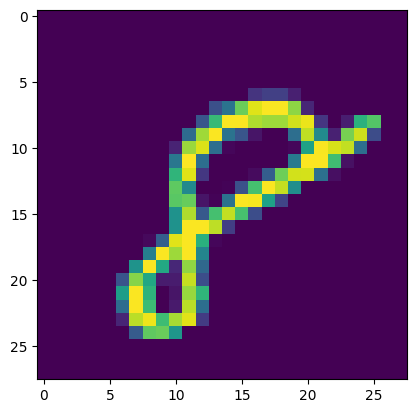

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[-1])

In [9]:
X_train.max()

255

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train.max()

1.0

In [12]:
y_train.max()

9

In [13]:
model = Sequential()

#### we have to flatten because it has 28 x 28 px
#### we want 784 as inputs , so we have to flatten

In [14]:
from tensorflow.keras.layers import Flatten,Dense

In [15]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

/home/sai-deekshith/Documents/Machine_Learning/.venv1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-31 14:44:07.976553: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam")

In [18]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4711 - val_loss: 0.1631
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1270 - val_loss: 0.1246
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0843 - val_loss: 0.0937
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0616 - val_loss: 0.0925
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0466 - val_loss: 0.0856
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0353 - val_loss: 0.0985
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0276 - val_loss: 0.0957
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0206 - val_loss: 0.0890
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0173 - val_loss: 0.0896
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0137 - val_loss: 0.0922


In [19]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step


In [20]:
y_pred = y_prob.argmax(axis=1)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred)*100)

Accuracy Score:  97.74000000000001


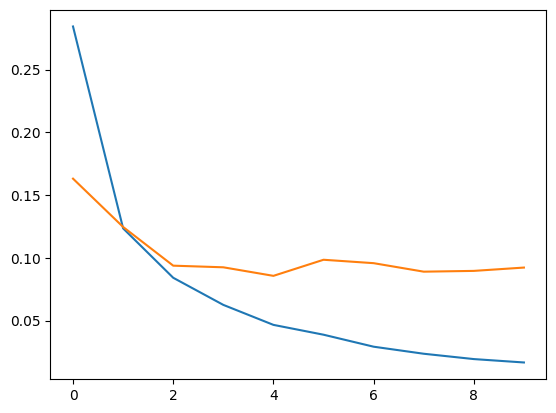

In [27]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

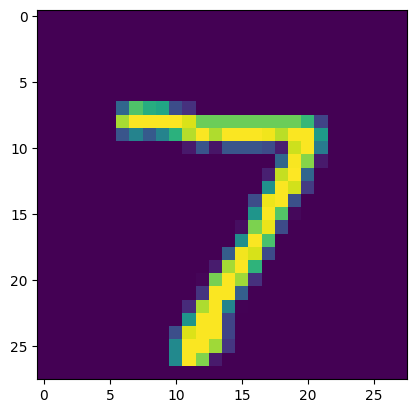

In [28]:
plt.imshow(X_test[0])

In [29]:
y_pred[0]

7

In [30]:
model.predict(X_test[0].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[6.1666685e-09, 1.9703147e-11, 4.1465225e-07, 5.5537326e-05,
        1.7352322e-14, 4.6040274e-10, 1.8941851e-12, 9.9994183e-01,
        2.0234811e-08, 2.0954189e-06]], dtype=float32)

### the above model.pred... gives the each number prediction of a single image 